# 1. Hashing task!

In [1]:
import numpy as np
import random
import time
import pandas as pd
from random import shuffle as sf
from random import randint as rd
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

### First of all we need to find (n) the number of all the elements which are going to be inserted in the bloom filter.

In [2]:
pool = open("passwords1.txt")
n = 0
while(pool.readline() != ""):
    n += 1
pool.close()

In [3]:
print(n)

100000000


### From the bloom filter's wikipedia page we can see that the optimal number of hash functions can be attained from these formulas:
### $k = \frac{m}{n} ln(2)$
### $m = - \frac{n (lnp)}{(ln2)^2}$
##### k = The number of hash functions.<br>n = The number of inserted elements.<br>m = Size of the bloom filter.<br>p = False positive rate.

In [4]:
# here we take p = 0.01 and find corresponding m:
p = 0.05
m = -1*n*np.log(p)/(np.log(2))**2
print(m)

623522422.9572682


#### We want the size of our bloom filter to be a prime number so we can use it in our hash function, so we will find the closest prime number to this:

In [5]:
def is_prime(a):
    ub = np.floor(int(np.sqrt(a)))
    for i in range(2 ,int(ub)):
        if a % i == 0:
            return False
    return True

def closest_prime(a):
    i = 0
    a = np.floor(a)
    while(True):
        if(is_prime(a +i)):
            return int(a + i)
        if( m -i > 0 and is_prime(a -i)):
            return int(a - i)
        i += 1

m = closest_prime(m)
print(m)

623522423


#### Now that we have the size of our bloom filter, we can find the optimal number of hash functions:

In [6]:
k = m * np.log(2) / n
k = int(round(k))
print(k)

4


### It's time to create our hash functions
#### We need 20 random coefficients for each hash function:

In [7]:
coeffs = []
for i in range(k):
    a = []
    for j in range(20):
        a.append(random.randrange(m))
    coeffs.append(a)
print(coeffs)
        

[[137764682, 314396409, 353945432, 75742771, 309245389, 18300369, 272098438, 40734884, 56208480, 33011002, 317609153, 582008730, 329017868, 298235097, 592170620, 283341426, 337819242, 55136982, 298203738, 234778959], [492398237, 529394535, 270980423, 385778073, 172099484, 512972309, 87370041, 63574328, 233832667, 206353444, 432606583, 129495094, 440497579, 181275207, 477360785, 522286155, 611343192, 122219416, 57299481, 237780027], [571923885, 302176175, 197234184, 342650466, 523602128, 359926323, 229552571, 37271860, 61547816, 337345667, 268219831, 233733500, 365994133, 557121759, 499169399, 479601089, 140454426, 87488479, 295977027, 96147671], [553424247, 37761661, 485554170, 603090137, 69506933, 306857497, 350832038, 540896445, 444856890, 442407900, 425931361, 162983597, 236613639, 420498737, 87324404, 14297922, 402698035, 119776982, 618053139, 92108484]]


In [8]:
def my_hash(m, coeffs, string):
    h = 0
    for i in range(20):
        h += ord(string[i]) * coeffs[i]
    return h%m

### Now that our hash functions are ready, we can fill out the bloom filter:

In [9]:
bloom_filter = []
for i in range(m):
    bloom_filter.append(False)

In [10]:
pool = open("passwords1.txt")
start = time.time()
for i in range(n):
    s = pool.readline()
    for j in range(k):
        key = my_hash(m, coeffs[j], s)
        bloom_filter[key] = True
pool.close()

### Now that the bloom filter is available we can get the results for our test set.

In [11]:
duplicate = 0 #counter for duplicate passwords
test = open("passwords2.txt")
s = test.readline()
while(s != ""):
    flag = True
    for i in range(k):
        key = my_hash(m, coeffs[i], s)
        if( bloom_filter[key] == False ):
            flag = False
            break
    if(flag):
        duplicate += 1
    s = test.readline()
end = time.time()
test.close()
print(duplicate, " password(s) are present in the filter.")

15257184  password(s) are present in the filter.


In [13]:
print('Number of hash function used: ', k)
print('Number of duplicates detected: ', duplicate)
print('Probability of false positives: around ', p)
print('Execution time: ', end-start)

Number of hash function used:  4
Number of duplicates detected:  15257184
Probability of false positives: around  0.05
Execution time:  2782.8581113815308


# 3. Find similar wines!

In [2]:
f= open("C:/Users/nazi/Desktop/Ms Courses/ADM/HW4/3. Find similar wines/wine.data","r")
columns=['type', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
         'Total phenols','Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
         'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df=pd.read_csv(f, delimiter=",", header=None, names= columns)
points = []
for i in range(len(df)):
    points.append((df['Ash'][i], df['Alcohol'][i]))


In [3]:
range_x = (int(np.floor(min(df['Ash']))), int(np.ceil(max(df['Ash']))))
range_y = (int(np.floor(min(df['Alcohol']))), int(np.ceil(max(df['Alcohol']))))
print(range_x, range_y)

(1, 4) (11, 15)


In [4]:
def dist(x,y):
    distance=math.sqrt(sum([(a-b)**2 for a,b in zip(x,y)])) #Euclidean distance
    return distance

In [5]:
def kmeans(points, k, range_x, range_y):
    flag = True
    centers = []
    clusters = [[] for i in range(k)]  #A dictionary that groupify the points according to the clusters
    for _ in range(k):
        centers.append((random.randrange(range_x[0], range_x[1]), random.randrange(range_y[0], range_y[1])))
    plt.figure(figsize=(20,10))
    plt.gca().set_aspect('equal', adjustable='box')
    for c in centers:
        plt.scatter(c[0],c[1], c='g',marker='X',linewidths=10)
    for point in points:
        plt.scatter(point[0],point[1], c='b', marker='o')
    plt.show()
    iter = 0
    while(flag):
        if iter > 0:
            flag = False
        for point in points:
            cluster = -1
            for i in range(len(clusters)): #find cluster
                for item in clusters[i]:
                    if item == point:
                        cluster = i
            distances = [] #find new cluster
            for c in centers: 
                distances.append(dist(c, point))
            new_cluster = np.argmin(distances)
            if iter > 0 and cluster != new_cluster:
                flag = True
                clusters[cluster].remove(point)
            clusters[new_cluster].append(point)
                
        
                #updating scatterplot
        plt.figure(figsize=(20,10))
        for c in centers:
            plt.scatter(c[0],c[1], c='g',marker='X',linewidths=10)
        #color=iter(cm.rainbow(np.linspace(0,1,len(clusters))))
        colors = cm.rainbow(np.linspace(0, 1, k))
        for i in range(k):
            for p in clusters[i]:
                plt.scatter(p[0],p[1], c = [colors[i]], marker='o')
        plt.title('WINES',fontsize=30)
        plt.xlabel('Ash',fontsize=20)
        plt.ylabel('Alcohol',fontsize=20)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()
                    

        #updating centers
        for i in range(len(centers)):
            sum_x = 0
            sum_y = 0
            for item in clusters[i]:
                sum_x += item[0]
                sum_y += item[1]
            try:
                centers[i] = (sum_x/len(clusters[i]), (sum_y/len(clusters[i])))
            except ZeroDivisionError:
                pass
        iter +=1
    

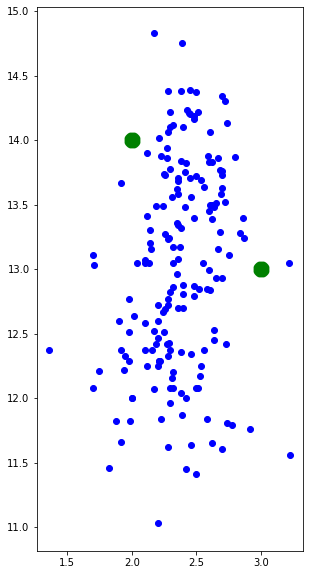

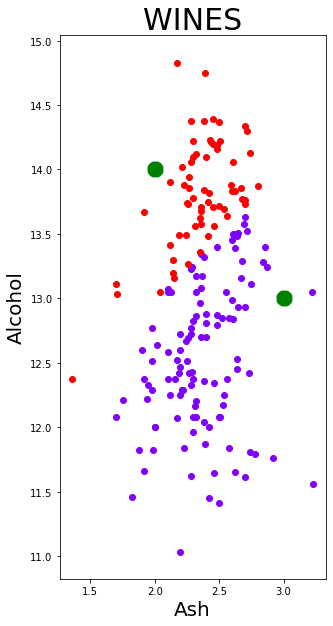

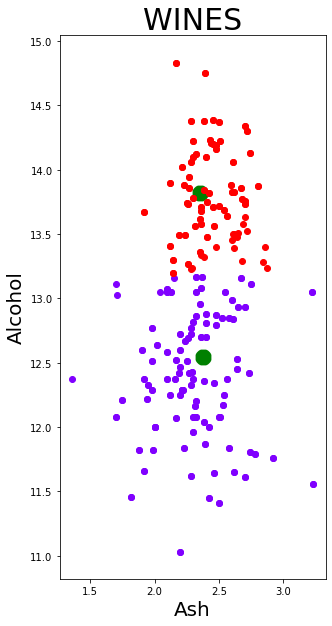

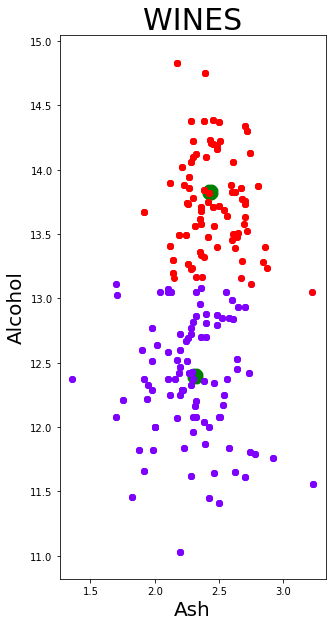

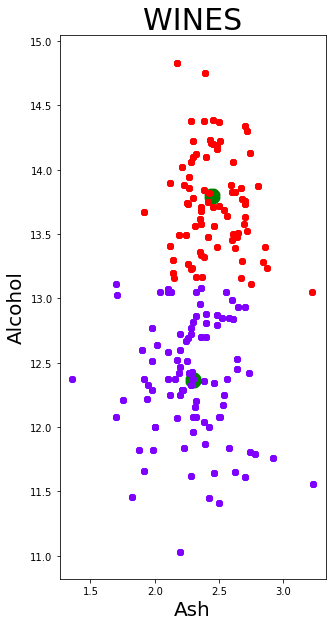

In [6]:
kmeans(points, 2, range_x, range_y)